<a href="https://colab.research.google.com/github/Rafa2016831028/Thesis/blob/main/K_means_OFD_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import os

from google.colab import files
uploaded = files.upload()
      

Saving OFD.csv to OFD (1).csv


In [ ]:
data= pd.read_csv('OFD.csv')

In [ ]:
#DATA CLEANING
data.isnull().sum()

Timestamp                                                                                                                           0
1. Where do you live during the Pandemic?                                                                                           0
2. Currently, are you living with?                                                                                                  0
3. What is your age (choose the best match range)?                                                                                  0
4. Your Gender?                                                                                                                     0
4. Your Profession?                                                                                                                31
5. What is your current salary range? (monthly)                                                                                     0
6. Does the Covid-19 pandemic affect your financial condition?

In [ ]:
data.columns

Index(['Timestamp', '1. Where do you live during the Pandemic?',
       '2. Currently, are you living with?',
       '3. What is your age (choose the best match range)?', '4. Your Gender?',
       '4. Your Profession?',
       '5. What is your current salary range? (monthly)',
       '6. Does the Covid-19 pandemic affect your financial condition?',
       '7. How frequently you order food online?',
       '8. Did you order food online during the Covid-19 pandemic?',
       '9. Do you feel safe using OFD (Online Food Ordering) during the Covid-19  pandemic?',
       '10. If yes or no, please share the reason?',
       '11. Do you think the restaurant food quality is maintained when you order online during the Covid-19 pandemic?',
       '12. Do you prefer third-party apps (For example FoodPanda / PathaoFood ) more than a restaurant's website to order food online?',
       '13. Which apps did you use so far for online food ordering?',
       '14. Your preferred payment method for OFD (On

In [ ]:
# Sir, After analyse google form response, i hand picked 2, 6, 9, 14 17 18 23 25 26 no question. With intent to clean the data for clustering i am droping the other fields especially quantitive one.
# We may discuss and modify the handpicked factors for further analysis. 
data =data.rename(columns={"1. Where do you live during the Pandemic?": "LIVING_AREA",
                     "2. Currently, are you living with?": "LIVING_STATUS",
                     "3. What is your age (choose the best match range)?":"AGE",
                     "4. Your Gender?":"GENDER",
                     "4. Your Profession?":"PROFESSION",
                     "5. What is your current salary range? (monthly)":"SALARY_RANGE",
                     "6. Does the Covid-19 pandemic affect your financial condition?":"FINANCIAL_CONDITION_AFFECT",
                     "7. How frequently you order food online?":"ORDER_FREQUENCY",
                     "8. Did you order food online during the Covid-19 pandemic?":"ORDER_DURING_PENDAMIC",
                     "9. Do you feel safe using OFD (Online Food Ordering) during the Covid-19  pandemic?":"SAFE_FEEL",
                     "11. Do you think the restaurant food quality is maintained when you order online during the Covid-19 pandemic?":"Perspective_On_Quality",
                     "12. Do you prefer third-party apps (For example FoodPanda / PathaoFood ) more than a restaurant's website to order food online?":"SYSTEM_PREFERENCE",
                     "13. Which apps did you use so far for online food ordering?":"USED_OFD",
                     "14. Your preferred payment method for OFD (Online Food Delivery)?":"PAYMENT_METHOD",
                     "15. Do you think the restaurant rating system in OFD help to order good quality food?  ":"RATING_HELP",
                     "16. What do you think OFD (Online Food Delivery) should improve during a pandemic?":"IMPROVE",
                     "17. Do you feel OFD ensures timeliness?":"timeliness",
                     "18. Do you think OFD provides food less cost then restaurants?":"LESS_COST",
                     "19. When is the best time to use OFD (Online Food Delivery) for you?":"PREFERED_TIME",
                     "20. Did you face any issue describing your address to the delivery man while using (Online Food Delivery) during the pandemic?":"DELIVERY_ISSUE",
                     "21. What encourages you most to use OFD (Online Food Delivery) during a pandemic? ":"ENCOURAGEMENT",
                     "22. What safety measure you notice OFD providers take to ensure safety for the Covid-19  pandemic?":"NOTICED_SAFETY_MEASURE",
                     "23. Did you notice any difference in OFD (Online Food Delivery) before and after the pandemic?":"DIFFERENCE",
                     "24. If yes what's the difference?":"OBSERVED_DIFFERENCE",
                     "25. Did you face any issues using OFD  during the pandemic?":"FACED_ISSUE",
                     "26. Did OFD (Online Food Delivery) owners take any steps to solve the issues you have faced?":"SOLVED_ISSUE"
 })
data.head()

,Timestamp,LIVING_AREA,LIVING_STATUS,AGE,GENDER,PROFESSION,SALARY_RANGE,FINANCIAL_CONDITION_AFFECT,ORDER_FREQUENCY,ORDER_DURING_PENDAMIC,SAFE_FEEL,"10. If yes or no, please share the reason?",Perspective_On_Quality,SYSTEM_PREFERENCE,USED_OFD,PAYMENT_METHOD,RATING_HELP,IMPROVE,timeliness,LESS_COST,PREFERED_TIME,DELIVERY_ISSUE,ENCOURAGEMENT,NOTICED_SAFETY_MEASURE,DIFFERENCE,OBSERVED_DIFFERENCE,FACED_ISSUE,SOLVED_ISSUE,27. Any Comments?
0,2020/10/19 9:46:13 PM GMT+6,Urban area,Family,26-35 Years,Male,Job,"20,000 to 40,000 BDT",No,Never,never,Not always,No reason,No,No,Restaurants Facebook Page,Cash on delivery,No,"Good food, reasonable price, good service, hygine",Not Always,No,Night,No,Discount,Restaurants with Hygiene tag(where OFD ensures...,Yes,Add sanitation option,damage food,responded lately,NaN
1,2020/10/19 9:50:19 PM GMT+6,Urban area,Family,26-35 Years,Female,NaN,"20,000 to 40,000 BDT",Partially,Occationally,More than 10 time,Yes,I need to sanitize the boxes only and also i m...,Not Always,Yes,Foodpanda;Pathao Food;Restaurants Facebook Pag...,others,Maybe,NaN,NaN,NaN,Afternoon,Yes,NaN,Free Sanitization tool (ex. Alchohol Pad) prov...,NaN,NaN,NaN,responded immidiately,NaN
2,2020/10/19 9:50:52 PM GMT+6,Urban area,Family,36-50 Years,Male,Software Engineer,"Above 80,000 BDT",No,Occationally,never,Not always,I dont know,No,Yes,Foodpanda;Uber Eats;HungryNaki,MFS (bkash /Nogodh ),No,NaN,Yes,No,Evening,Yes,Save time and effort,Contact less delivery,No,NaN,Delivary man cant get the location,Did not response,NaN
3,2020/10/19 9:51:25 PM GMT+6,Urban area,Family,19-25 Years,Male,Student,"20,000 to 40,000 BDT",Yes,Weekly,More than 10 time,Not always,NaN,Not Always,Yes,Foodpanda;Pathao Food;Uber Eats,Cash on delivery,Yes,NaN,Not Always,Yes,Evening,Yes,Promo codes;Free Delivery;Discount,Contact less delivery;Their advertisement of h...,Yes,Add contactless delivery;Add sanitation option...,Order cancellation withput reason;Delivery man...,Did not response,no
4,2020/10/19 9:52:11 PM GMT+6,Urban area,Family,26-35 Years,Male,Software Engineer,"20,000 to 40,000 BDT",No,Occationally,Once / Twice,No,"Because, I dont know the environment where the...",Not Always,No,Foodpanda,Cash on delivery,Maybe,delivery boys should be honest,Not Always,No,Afternoon,No,Save time and effort,Free Sanitization tool (ex. Alchohol Pad) prov...,No,NaN,No safety measures,Did not response,NaN


In [ ]:
# removing qualitative analysis fields 10 ,16 ,27
# 13, 22 & 25 needs special data cleaning
data.drop('27. Any Comments?',axis=1,inplace=True)
#data.drop('25. Did you face any issues using OFD during the pandemic?',axis=1,inplace=True)
data.drop('IMPROVE',axis=1, inplace=True)
data.drop('10. If yes or no, please share the reason?',axis=1, inplace=True)

data.head()

,Timestamp,LIVING_AREA,LIVING_STATUS,AGE,GENDER,PROFESSION,SALARY_RANGE,FINANCIAL_CONDITION_AFFECT,ORDER_FREQUENCY,ORDER_DURING_PENDAMIC,SAFE_FEEL,Perspective_On_Quality,SYSTEM_PREFERENCE,USED_OFD,PAYMENT_METHOD,RATING_HELP,timeliness,LESS_COST,PREFERED_TIME,DELIVERY_ISSUE,ENCOURAGEMENT,NOTICED_SAFETY_MEASURE,DIFFERENCE,OBSERVED_DIFFERENCE,FACED_ISSUE,SOLVED_ISSUE
0,2020/10/19 9:46:13 PM GMT+6,Urban area,Family,26-35 Years,Male,Job,"20,000 to 40,000 BDT",No,Never,never,Not always,No,No,Restaurants Facebook Page,Cash on delivery,No,Not Always,No,Night,No,Discount,Restaurants with Hygiene tag(where OFD ensures...,Yes,Add sanitation option,damage food,responded lately
1,2020/10/19 9:50:19 PM GMT+6,Urban area,Family,26-35 Years,Female,NaN,"20,000 to 40,000 BDT",Partially,Occationally,More than 10 time,Yes,Not Always,Yes,Foodpanda;Pathao Food;Restaurants Facebook Pag...,others,Maybe,NaN,NaN,Afternoon,Yes,NaN,Free Sanitization tool (ex. Alchohol Pad) prov...,NaN,NaN,NaN,responded immidiately
2,2020/10/19 9:50:52 PM GMT+6,Urban area,Family,36-50 Years,Male,Software Engineer,"Above 80,000 BDT",No,Occationally,never,Not always,No,Yes,Foodpanda;Uber Eats;HungryNaki,MFS (bkash /Nogodh ),No,Yes,No,Evening,Yes,Save time and effort,Contact less delivery,No,NaN,Delivary man cant get the location,Did not response
3,2020/10/19 9:51:25 PM GMT+6,Urban area,Family,19-25 Years,Male,Student,"20,000 to 40,000 BDT",Yes,Weekly,More than 10 time,Not always,Not Always,Yes,Foodpanda;Pathao Food;Uber Eats,Cash on delivery,Yes,Not Always,Yes,Evening,Yes,Promo codes;Free Delivery;Discount,Contact less delivery;Their advertisement of h...,Yes,Add contactless delivery;Add sanitation option...,Order cancellation withput reason;Delivery man...,Did not response
4,2020/10/19 9:52:11 PM GMT+6,Urban area,Family,26-35 Years,Male,Software Engineer,"20,000 to 40,000 BDT",No,Occationally,Once / Twice,No,Not Always,No,Foodpanda,Cash on delivery,Maybe,Not Always,No,Afternoon,No,Save time and effort,Free Sanitization tool (ex. Alchohol Pad) prov...,No,NaN,No safety measures,Did not response


In [ ]:
data.columns

Index(['Timestamp', 'LIVING_AREA', 'LIVING_STATUS', 'AGE', 'GENDER',
       'PROFESSION', 'SALARY_RANGE', 'FINANCIAL_CONDITION_AFFECT',
       'ORDER_FREQUENCY', 'ORDER_DURING_PENDAMIC', 'SAFE_FEEL',
       'Perspective_On_Quality', 'SYSTEM_PREFERENCE', 'USED_OFD',
       'PAYMENT_METHOD', 'RATING_HELP', 'timeliness', 'LESS_COST',
       'PREFERED_TIME', 'DELIVERY_ISSUE', 'ENCOURAGEMENT',
       'NOTICED_SAFETY_MEASURE', 'DIFFERENCE', 'OBSERVED_DIFFERENCE',
       'FACED_ISSUE', 'SOLVED_ISSUE'],
      dtype='object')

In [ ]:
data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

cleanData = pd.DataFrame({
    'AREA': lb_make.fit_transform(data['LIVING_AREA']),
    'LS': lb_make.fit_transform(data['LIVING_STATUS']),
    'AGE': lb_make.fit_transform(data['AGE']),
    'GENDER': lb_make.fit_transform(data['GENDER']),
    'PROFESSION': lb_make.fit_transform(data['PROFESSION'].astype(str)),
    'SALARY': lb_make.fit_transform(data['SALARY_RANGE']),
    'COVID_FE': lb_make.fit_transform(data['FINANCIAL_CONDITION_AFFECT']),
    'FREQUENCY':lb_make.fit_transform(data['ORDER_FREQUENCY']),
    'ORDER_C': lb_make.fit_transform(data['ORDER_DURING_PENDAMIC']),
    'SAFE_FEEL':lb_make.fit_transform(data['SAFE_FEEL']),
    'PERSPECTIVE':lb_make.fit_transform(data['Perspective_On_Quality']),
    'PREFERENCE':lb_make.fit_transform(data['SYSTEM_PREFERENCE']),
    'USED':lb_make.fit_transform(data['USED_OFD']),
    'PAYMENT':lb_make.fit_transform(data['PAYMENT_METHOD']),
    'RATING_HELP':lb_make.fit_transform(data['RATING_HELP'].astype(str)),
    'timeliness':lb_make.fit_transform(data['timeliness'].astype(str)),
    'LESS_COST':lb_make.fit_transform(data['LESS_COST'].astype(str)),
    'PREFERED_TIME': lb_make.fit_transform(data['PREFERED_TIME']),
    'DELIVERY_ISSUE': lb_make.fit_transform(data['DELIVERY_ISSUE']),
    'ENCOURAGEMENT': lb_make.fit_transform(data['ENCOURAGEMENT'].astype(str)),
    'NOTICED_SM': lb_make.fit_transform(data['NOTICED_SAFETY_MEASURE']),

})
cleanData.head(20)

,AREA,LS,AGE,GENDER,PROFESSION,SALARY,COVID_FE,FREQUENCY,ORDER_C,SAFE_FEEL,PERSPECTIVE,PREFERENCE,USED,PAYMENT,RATING_HELP,timeliness,LESS_COST,PREFERED_TIME,DELIVERY_ISSUE,ENCOURAGEMENT,NOTICED_SM
0,2,1,2,1,16,0,0,2,3,1,0,0,25,0,1,1,0,3,0,4,21
1,2,1,2,0,36,0,1,3,1,2,1,2,6,3,0,3,2,0,1,39,15
2,2,1,3,1,27,3,0,3,3,1,0,2,20,2,1,2,0,1,1,37,2
3,2,1,1,1,30,0,2,4,1,1,1,2,9,0,2,1,1,1,1,21,8
4,2,1,2,1,27,0,0,3,2,0,1,0,2,0,0,1,0,0,0,37,16
5,2,1,2,1,2,1,2,4,1,2,2,2,5,0,2,2,0,3,0,8,2
6,2,1,1,1,27,0,0,3,0,1,2,2,23,0,0,1,0,1,0,0,2
7,2,1,2,1,26,0,2,3,0,1,1,1,2,0,0,0,0,0,0,16,2
8,2,0,2,1,22,1,1,3,0,1,1,2,2,1,2,2,0,1,0,9,0
9,2,1,2,1,32,0,2,2,3,0,0,1,2,0,1,1,1,1,0,4,22


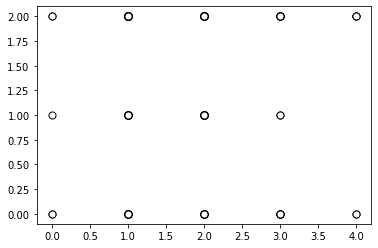

In [ ]:
plt.scatter(
   cleanData['AGE'], cleanData['COVID_FE'],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [ ]:
cleanData.columns =cleanData.columns.str.upper()
cleanData

,AREA,LS,AGE,GENDER,PROFESSION,SALARY,COVID_FE,FREQUENCY,ORDER_C,SAFE_FEEL,PERSPECTIVE,PREFERENCE,USED,PAYMENT,RATING_HELP,TIMELINESS,LESS_COST,PREFERED_TIME,DELIVERY_ISSUE,ENCOURAGEMENT,NOTICED_SM
0,2,1,2,1,16,0,0,2,3,1,0,0,25,0,1,1,0,3,0,4,21
1,2,1,2,0,36,0,1,3,1,2,1,2,6,3,0,3,2,0,1,39,15
2,2,1,3,1,27,3,0,3,3,1,0,2,20,2,1,2,0,1,1,37,2
3,2,1,1,1,30,0,2,4,1,1,1,2,9,0,2,1,1,1,1,21,8
4,2,1,2,1,27,0,0,3,2,0,1,0,2,0,0,1,0,0,0,37,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1,1,1,0,30,4,2,2,3,2,2,2,26,0,2,2,1,1,1,19,22
137,2,1,2,0,36,4,0,4,0,1,1,2,15,0,3,3,2,3,0,21,22
138,1,1,3,1,36,5,2,3,2,1,1,2,25,0,3,3,2,2,0,35,15
139,1,1,1,1,40,4,2,3,3,0,1,2,11,0,0,1,1,0,0,8,0


In [ ]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(cleanData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmean.cluster_centers_

array([[ 1.63888889,  0.80555556,  1.66666667,  0.66666667, 33.05555556,
         3.41666667,  1.30555556,  2.63888889,  2.05555556,  1.27777778,
         1.19444444,  1.52777778, 11.30555556,  0.5       ,  1.16666667,
         1.33333333,  0.69444444,  1.75      ,  0.36111111,  6.        ,
        15.97222222],
       [ 1.65217391,  0.84782609,  1.54347826,  0.82608696, 31.80434783,
         3.23913043,  1.26086957,  2.43478261,  1.43478261,  1.30434783,
         1.19565217,  1.76086957,  9.19565217,  0.17391304,  1.19565217,
         1.41304348,  0.67391304,  1.39130435,  0.58695652, 26.86956522,
         4.67391304],
       [ 1.55      ,  0.7       ,  2.25      ,  0.85      ,  7.65      ,
         1.75      ,  0.9       ,  2.55      ,  1.45      ,  1.35      ,
         1.        ,  1.45      , 15.        ,  0.9       ,  1.55      ,
         1.55      ,  0.5       ,  1.55      ,  0.4       , 16.1       ,
        12.75      ],
       [ 1.58974359,  0.8974359 ,  1.64102564,  0.61538462

In [ ]:
Kmean.labels_

array([2, 3, 1, 1, 3, 2, 0, 1, 0, 0, 3, 3, 1, 3, 3, 3, 1, 2, 3, 0, 1, 2,
       2, 2, 1, 1, 0, 1, 3, 1, 0, 2, 3, 3, 1, 0, 1, 1, 1, 3, 3, 0, 1, 3,
       0, 1, 1, 1, 1, 0, 3, 0, 1, 1, 0, 3, 1, 0, 0, 0, 3, 3, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 0, 2, 2, 1,
       2, 0, 0, 2, 1, 2, 2, 1, 3, 2, 0, 0, 0, 1, 0, 1, 2, 3, 1, 3, 3, 0,
       0, 3, 3, 0, 0, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 2, 0, 0, 3, 2,
       3, 0, 1, 0, 3, 3, 3, 0, 0], dtype=int32)

In [ ]:
label = Kmean.labels_

In [ ]:
from collections import Counter
Counter(label).keys() # equals to list(set(words))
Counter(label).values() # counts the elements' frequency

dict_values([20, 39, 46, 36])

In [ ]:
#ELBOW FUNCTION 
k_Range = range(1,33)
WCSS = []

In [ ]:
for k in k_Range:
  Kmean = KMeans(n_clusters=k)
  Kmean.fit(cleanData)
  WCSS.append(Kmean.inertia_)

In [ ]:
WCSS

[63444.354609929076,
 46039.44699872286,
 38132.20308729356,
 32701.21190476191,
 27897.31243142856,
 24030.967930117964,
 21185.45987988937,
 19592.57938570605,
 17995.203917155643,
 16681.196185840305,
 15390.05868983957,
 14144.405527805528,
 12684.400713175713,
 12423.952716117732,
 12099.149875124875,
 10927.19153069153,
 10574.499025974026,
 10041.79163059163,
 9629.902533577533,
 9157.205677655678,
 8942.566378066378,
 8350.710064935065,
 8022.807375957376,
 7806.78823953824,
 7490.387373737374,
 7074.434415584416,
 6817.839213564213,
 6656.858874458874,
 6545.496825396825,
 6186.374603174603,
 5868.802525252524,
 5856.442207792208]

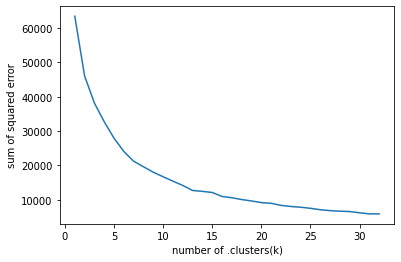

In [ ]:
plt.xlabel('number of .clusters(k)')
plt.ylabel('sum of squared error')
plt.plot(k_Range,WCSS)